In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans = pd.read_csv("card_transdata.csv")

In [3]:
trans.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
trans.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
trans.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
trans['distance_from_home'].value_counts()

57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: distance_from_home, Length: 1000000, dtype: int64

In [8]:
trans['distance_from_home'].max()

10632.723672241103

In [9]:
trans['distance_from_home'].min()

0.0048743850667442

In [10]:
trans['distance_from_last_transaction'].value_counts()

0.311140    1
3.640681    1
3.095558    1
3.273022    1
0.245656    1
           ..
3.680817    1
0.367765    1
0.841772    1
3.321236    1
0.318110    1
Name: distance_from_last_transaction, Length: 1000000, dtype: int64

In [11]:
trans['distance_from_last_transaction'].max()

11851.10456494614

In [12]:
trans['distance_from_last_transaction'].min()

0.000118281615244

In [13]:
trans['ratio_to_median_purchase_price'].value_counts()

1.945940    1
1.161855    1
0.607566    1
1.257822    1
1.846399    1
           ..
0.612613    1
0.491743    1
1.380752    1
0.967628    1
0.386920    1
Name: ratio_to_median_purchase_price, Length: 1000000, dtype: int64

In [14]:
trans['ratio_to_median_purchase_price'].max()

267.8029421832708

In [15]:
trans['ratio_to_median_purchase_price'].min()

0.004399239615964

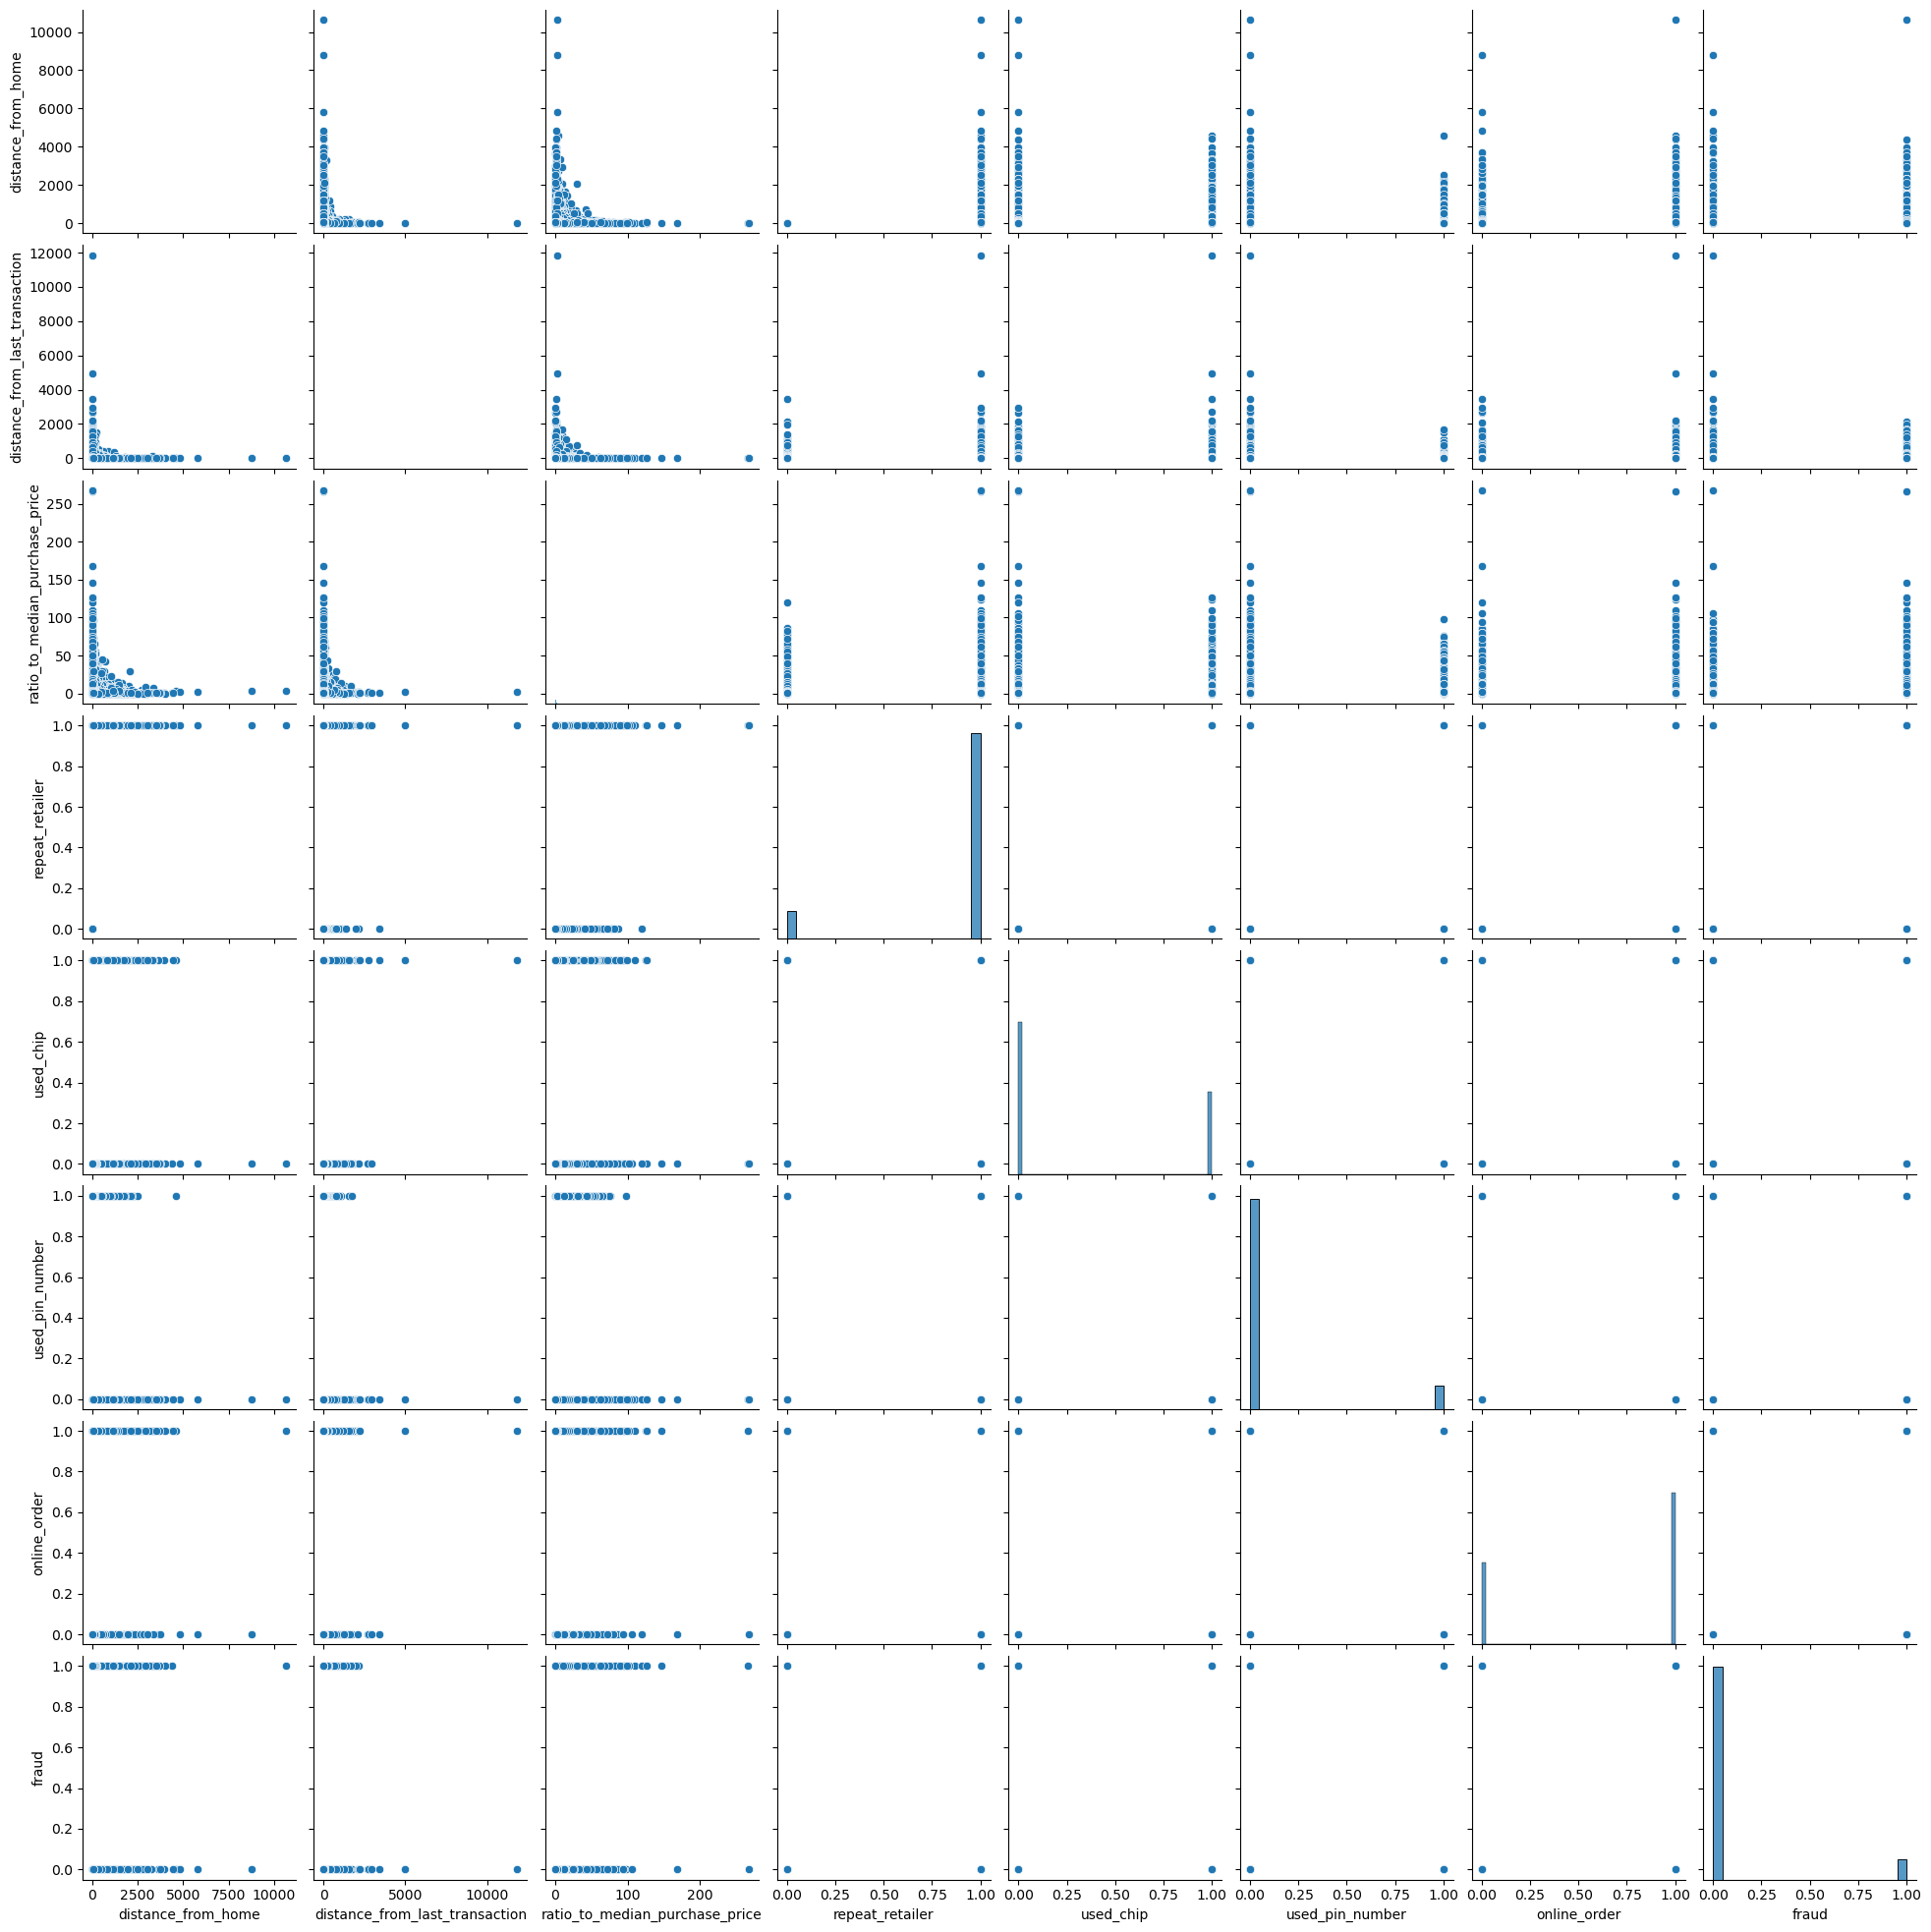

In [57]:
sns.pairplot(data = trans)

In [17]:
trans['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [18]:
fraud_count = trans['fraud'].value_counts()

([<matplotlib.patches.Wedge at 0x1c9384f3e50>,
 [Text(-1.058791700494653, 0.29826185636725505, '0.0'),
  Text(1.058791700494653, -0.2982618563672552, '1.0')],
 [Text(-0.5775227457243561, 0.16268828529123003, '91.3%'),
  Text(0.5775227457243561, -0.16268828529123008, '8.7%')])

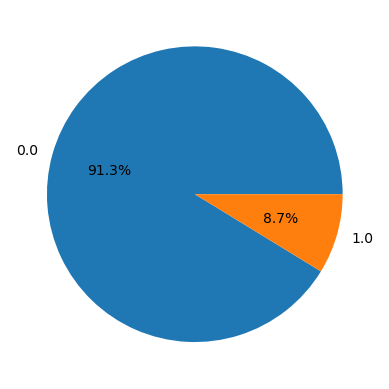

In [19]:
plt.pie(fraud_count.values,labels  = fraud_count.index,autopct = '%1.1f%%')

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()

In [22]:
scale.fit(trans.drop('fraud',axis = 1))

StandardScaler()

In [23]:
scaled_feat = scale.transform(trans.drop('fraud',axis = 1))

In [24]:
trans_feat = pd.DataFrame(scaled_feat,columns = trans.columns[:-1])

In [25]:
trans_feat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909


In [26]:
X = trans_feat
y = trans['fraud']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
loG = LogisticRegression()

In [31]:
loG.fit(X_train,y_train)

LogisticRegression()

In [32]:
pred = loG.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [34]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



[[271911   1960]
 [ 10456  15673]]


0.9586133333333333


In [35]:
loG.classes_

array([0., 1.])

In [36]:
cm = confusion_matrix(y_test,pred, labels = loG.classes_ )

In [37]:
cm

array([[271911,   1960],
       [ 10456,  15673]], dtype=int64)

In [38]:
cm_dis =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no fruad_transaction','fruadulent transaction'])

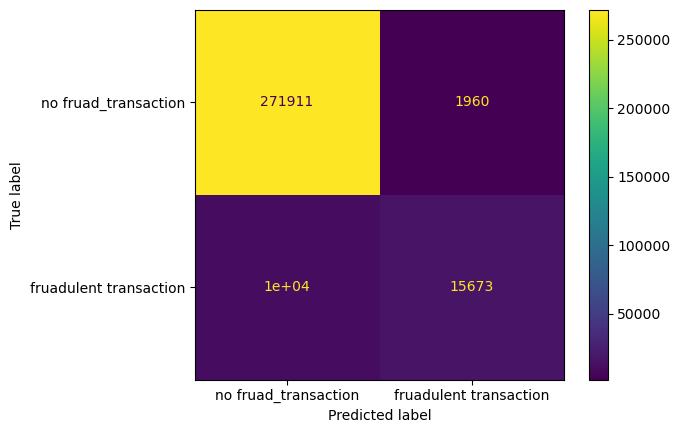

In [39]:
cm_dis.plot()

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
predict = dtree.predict(X_test)

In [44]:
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print(accuracy_score(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



[[273870      1]
 [     2  26127]]


0.99999


In [45]:
dtree.classes_

array([0., 1.])

In [46]:
con = confusion_matrix(y_test,predict , labels = dtree.classes_)

In [47]:
condisplay = ConfusionMatrixDisplay(confusion_matrix = con, display_labels= ['0','1'])

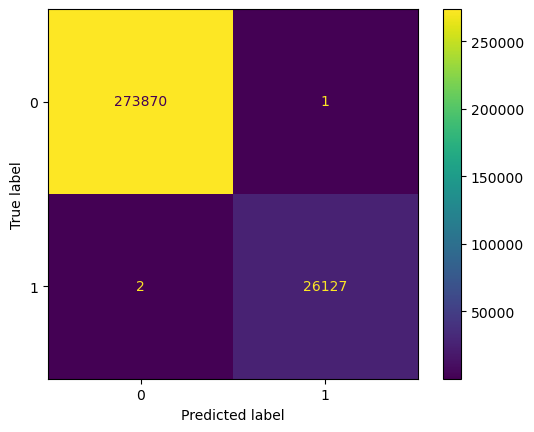

In [48]:
condisplay.plot()

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators= 100)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
predicts = rfc.predict(X_test)

In [53]:
print(classification_report(y_test,predicts))
print('\n')
print(confusion_matrix(y_test,predicts))
print('\n')
print(accuracy_score(y_test,predicts))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



[[273871      0]
 [     2  26127]]


0.9999933333333333


In [54]:
cons = confusion_matrix(y_test,predicts , labels = rfc.classes_)

In [55]:
consdisplay = ConfusionMatrixDisplay(confusion_matrix = cons, display_labels= ['0','1'])

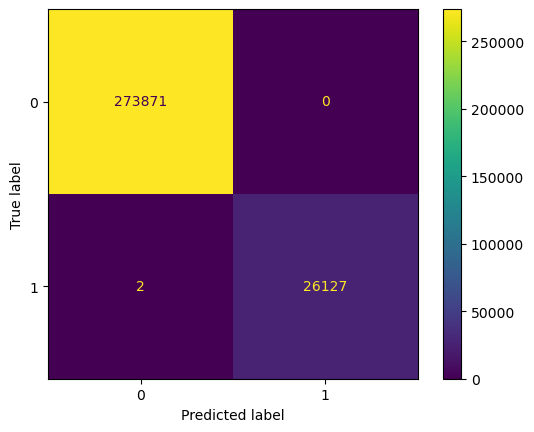

In [56]:
consdisplay.plot()